KeyError: 'model'

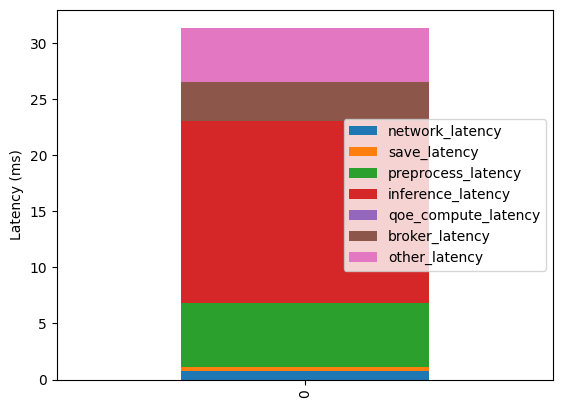

In [18]:
import pandas as pd

def calculate_latencies_ckn(df):
    df["network_latency"] = 0.720
    df["save_latency"] = (df["image_save_at"] - df["server_receive_at"]) * 1000
    df["preprocess_latency"] = (df["image_preprocessed_at"] - df["image_save_at"]) * 1000
    df["inference_latency"] = (df["image_predicted_at"] - df["image_preprocessed_at"]) * 1000
    df["qoe_compute_latency"] = (df["qoe_computed_at"] - df["image_predicted_at"]) * 1000
    df["broker_latency"] = (df["broker_produced_at"] - df["qoe_computed_at"]) * 1000
    df["total_latency"] = df["network_latency"] + df["save_latency"] + df["preprocess_latency"] + df["inference_latency"] + df["qoe_compute_latency"] + df["broker_latency"]
    df["rtt"] = (df["client_receive_at"] - df["client_send_at"]) * 1000
    df["other_latency"] = df["rtt"] - df["total_latency"]

    return df[["network_latency", "save_latency", "preprocess_latency", "inference_latency", "qoe_compute_latency", "broker_latency", "total_latency", "rtt", "other_latency"]]

results = pd.read_csv("results_ckn.csv")
results["model"] = "MobileNetV3 Small"

results = calculate_latencies_ckn(results)

# get mean of all columns 
results = results.mean()
results = results.to_frame().T

import matplotlib.pyplot as plt

results = results.drop(columns=["rtt", "total_latency"])
results.plot(kind='bar', stacked=True)
plt.ylabel("Latency (ms)")

plt.xticks([0], )
plt.xticks(rotation=0)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [3]:
def calculate_latencies_ckn(df):
    df["network_latency"] = 0.720
    df["save_latency"] = (df["image_save_at"] - df["server_receive_at"]) * 1000
    df["preprocess_latency"] = (df["image_preprocessed_at"] - df["image_save_at"]) * 1000
    df["inference_latency"] = (df["image_predicted_at"] - df["image_preprocessed_at"]) * 1000
    df["qoe_compute_latency"] = (df["qoe_computed_at"] - df["image_predicted_at"]) * 1000
    df["broker_latency"] = (df["broker_produced_at"] - df["qoe_computed_at"]) * 1000
    df["total_latency"] = df["network_latency"] + df["save_latency"] + df["preprocess_latency"] + df["inference_latency"] + df["qoe_compute_latency"] + df["broker_latency"]
    df["rtt"] = (df["client_receive_at"] - df["client_send_at"]) * 1000
    df["rtt - total_latency"] = df["rtt"] - df["total_latency"]

    return df[["network_latency", "save_latency", "preprocess_latency", "inference_latency", "qoe_compute_latency", "broker_latency", "total_latency", "rtt", "rtt - total_latency"]]


mobilenet_v3_small_ckn = pd.read_csv("mobilenet_ckn.csv")
mobilenet_v3_small_ckn = calculate_latencies_ckn(mobilenet_v3_small_ckn)
mobilenet_v3_small_ckn

,network_latency,save_latency,preprocess_latency,inference_latency,qoe_compute_latency,broker_latency,total_latency,rtt,rtt - total_latency
0,0.72,0.430584,6.242275,16.993999,0.013590,1.294136,25.694585,36.003590,10.309005
1,0.72,0.383377,5.556822,15.910864,0.010014,1.037598,23.618674,29.053450,5.434776
2,0.72,0.364542,5.365133,15.537500,0.010729,0.963688,22.961592,27.551651,4.590059
3,0.72,0.355721,5.377531,15.582561,0.010490,0.909090,22.955394,27.263641,4.308248
4,0.72,0.433207,5.946636,16.126394,0.013828,0.747919,23.987984,29.137850,5.149865
...,...,...,...,...,...,...,...,...,...
95,0.72,0.495434,6.305695,20.728588,0.017405,0.868559,29.135680,34.231424,5.095744
96,0.72,0.488997,6.233454,20.573616,0.019073,0.741720,28.776860,34.419298,5.642438
97,0.72,0.521183,6.369114,20.321846,0.016928,0.895023,28.844094,34.146070,5.301976
98,0.72,0.499249,6.400108,20.379782,0.018120,0.922918,28.940177,34.784079,5.843902


In [28]:
mobilenet = pd.read_csv("/Users/neeleshkarthikeyan/d2i/ckn-edge-optimization/micro_benchmarking/results/mobilenet_v3_small.csv")
mobilenet = calculate_latencies(mobilenet)
mobilenet

,network_latency,save_latency,preprocess_latency,inference_latency,rtt
0,11.893749,1.873970,15.130758,219.353199,243.696213
1,7.576466,2.254486,9.248734,230.154991,243.983984
2,7.358551,1.671076,8.413553,211.783886,224.723339
3,7.372141,1.367331,7.634401,213.730812,225.298166
4,7.170677,1.405001,6.799936,210.932970,221.664906
...,...,...,...,...,...
95,6.658316,1.458883,6.777763,141.091585,152.007580
96,6.240129,1.385689,6.647825,150.789976,161.283016
97,6.466627,1.370668,6.493807,141.293764,151.816368
98,6.321430,1.330137,6.371975,147.177219,157.804489


,network_latency,save_latency,preprocess_latency,inference_latency,rtt
0,-41.105986,1.805067,13.996363,177.504778,198.049545
1,-43.675900,1.569271,7.701159,180.952311,192.418575
2,-43.195009,1.522541,7.690907,177.364588,189.313412
3,-43.865442,1.413822,6.989002,177.439928,188.074827
4,-43.907881,1.366854,6.944180,175.025463,185.477257
...,...,...,...,...,...
95,-43.826580,1.390457,6.300688,156.200409,166.182995
96,-43.841362,1.330853,6.231546,157.380104,167.344809
97,-43.720484,1.443148,6.788492,159.817696,170.530319
98,-43.599129,1.373053,6.266832,159.398794,169.882536


In [ ]:
resnet = pd.read_csv("/Users/neeleshkarthikeyan/d2i/ckn-edge-optimization/micro_benchmarking/results/resnet.csv")
resnet = calculate_latencies(resnet)
resnet
